In [1]:
# Sample API
import flowx
flowx.__version__

'0.1.dev'

In [2]:
# Define grid parameters
nx, ny = 40, 40
xmin, xmax = 0.0, 1.0
ymin, ymax = 0.0, 1.0

# Define cell-centered variable names
center_vars   = ['pres', 'divv', 'asol', 'eror', 'delp']
face_vars     = ['velc', 'hvar', 'asol', 'eror']
ins_vars      = ['velc', 'hvar', 'divv', 'pres', 'delp']
poisson_vars  = ['delp', 'divv']

scalar_info   = dict(tmax = 10, dt = 0.001, Re = 100.0)

simulation_info = dict(time_stepping = 'ab2', poisson_solver = 'serial_lu', with_ib = False)

# Define boundary conditions for variable pressure and velocity [left, right, bottom, top]
bc_type_center = dict(delp = ['neumann', 'neumann', 'neumann', 'neumann'])
bc_val_center  = dict(delp = [0.0, 0.0, 0.0, 0.0])

bc_type_facex = dict(velc = ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet'])
bc_val_facex  = dict(velc = [0.0, 0.0, 0.0, 1.0])

bc_type_facey = dict(velc = ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet'])
bc_val_facey  = dict(velc = [0.0, 0.0, 0.0, 0.0])

gridc, gridx, gridy, scalars, particles = flowx.serial.domain_main(nx, ny, xmin, xmax, ymin, ymax,
                                              center_vars, face_vars, scalar_info,
                                              bc_type_center=bc_type_center, bc_val_center=bc_val_center,
                                              bc_type_facex=bc_type_facex, bc_val_facex=bc_val_facex,
                                              bc_type_facey=bc_type_facey, bc_val_facey=bc_val_facey)

domain_data_struct = [gridc, gridx, gridy, scalars, particles]

poisson = flowx.poisson_main(gridc, poisson_vars, simulation_info)

imbound = flowx.imbound_main(imbound_info=simulation_info)

ins = flowx.ins_main(poisson, imbound, domain_data_struct, ins_vars, simulation_info)

In [3]:
while scalars.time <= scalars.tmax:
    
    ins.advance()
    
    # Display stats
    if scalars.nstep % 10 == 0:
        flowx.io.display_stats(scalars)   

    scalars.advance()

------------ Time = 0.0 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.5211488613067788e-11
Total poisson time : 0.0007491111755371094
Total INS time : 0.0034589767456054688
Max, Min, U   : 2.0, -0.009552906204103956
Max, Min, V   : 0.02396714772440397, -0.02396714772440397
Max, Min, P   : 2.7095434868132378, -2.754569545659239
Max, Min, DIV : 2.55351295663786e-15, -2.654126918244515e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 0.010000000000000002 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.0491729142785419e-13
Total poisson time : 0.0003311634063720703
Total INS time : 0.0009288787841796875
Max, Min, U   : 2.0, -0.04365127264272606
Max, Min, V   : 0.13200014331389703, -0.13200014331389703
Max, Min, P   : 1.5240782898440721, -1.5392987574553132
Max, Min, DIV : 1.762479051592436e-15, -1.807581861967833e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 0.02000000000000001 ---------------
Number of poisson it

------------ Time = 0.2600000000000002 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.946879458743191e-15
Total poisson time : 0.0003600120544433594
Total INS time : 0.0009748935699462891
Max, Min, U   : 2.0, -0.15473843805234866
Max, Min, V   : 0.3251122819602639, -0.3886123187609385
Max, Min, P   : 1.0479159964845548, -0.9069836298136394
Max, Min, DIV : 3.3306690738754696e-15, -3.684552662974738e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 0.2700000000000002 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.783578942387215e-13
Total poisson time : 0.0004398822784423828
Total INS time : 0.0010559558868408203
Max, Min, U   : 2.0, -0.15669144419917497
Max, Min, V   : 0.3261219027115626, -0.39192931301912276
Max, Min, P   : 1.024354259579807, -0.9288230911685329
Max, Min, DIV : 4.0245584642661925e-15, -4.0870085094013575e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 0.2800000000000002 ---------------
Number of 

------------ Time = 0.5200000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0506110754526574e-13
Total poisson time : 0.00034689903259277344
Total INS time : 0.0009720325469970703
Max, Min, U   : 2.0, -0.18042415564151734
Max, Min, V   : 0.33840560397511726, -0.43567911185768304
Max, Min, P   : 0.6934748335906225, -1.2501137005258207
Max, Min, DIV : 3.9968028886505635e-15, -2.942091015256665e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 0.5300000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.0571957938661e-13
Total poisson time : 0.0006878376007080078
Total INS time : 0.0016529560089111328
Max, Min, U   : 2.0, -0.1810288349331686
Max, Min, V   : 0.3386406449555271, -0.43658616414961093
Max, Min, P   : 0.7255046410744461, -1.2182611336037352
Max, Min, DIV : 3.7816971776294395e-15, -3.9517000782751666e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 0.5400000000000004 ---------------
Number o

------------ Time = 0.7800000000000006 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.557524956408755e-13
Total poisson time : 0.00035572052001953125
Total INS time : 0.0009632110595703125
Max, Min, U   : 2.0, -0.19620670302422488
Max, Min, V   : 0.3423127465172387, -0.45374842669574966
Max, Min, P   : -0.3364540217195303, -2.2872981855517436
Max, Min, DIV : 3.608224830031759e-15, -3.9968028886505635e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 0.7900000000000006 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.9845125369175743e-13
Total poisson time : 0.0008020401000976562
Total INS time : 0.001984834671020508
Max, Min, U   : 2.0, -0.19673339006155283
Max, Min, V   : 0.3424025639364692, -0.4548596528526419
Max, Min, P   : -0.3684790258525727, -2.3196439925716397
Max, Min, DIV : 3.552713678800501e-15, -4.191091917959966e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 0.8000000000000006 ---------------
Number o

Max, Min, U   : 2.0, -0.20659544839552543
Max, Min, V   : 0.34377721310422005, -0.47285953207672865
Max, Min, P   : -0.8531928380845056, -2.8108806282367937
Max, Min, DIV : 3.552713678800501e-15, -4.28129753871076e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 1.0099999999999996 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.825940722186749e-14
Total poisson time : 0.0003409385681152344
Total INS time : 0.0009417533874511719
Max, Min, U   : 2.0, -0.20687906053642272
Max, Min, V   : 0.34382443414346425, -0.4735150448080653
Max, Min, P   : -0.8763562712343358, -2.834337434892623
Max, Min, DIV : 3.885780586188048e-15, -3.608224830031759e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 1.0199999999999985 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.6479581927046534e-13
Total poisson time : 0.0006070137023925781
Total INS time : 0.0016720294952392578
Max, Min, U   : 2.0, -0.20713949458337064
Max, Min, V   : 0.3438

------------ Time = 1.2499999999999731 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.269442340783263e-13
Total poisson time : 0.000408172607421875
Total INS time : 0.001155853271484375
Max, Min, U   : 2.0, -0.21467572297560075
Max, Min, V   : 0.3446652825636313, -0.48567981529248727
Max, Min, P   : -1.636706812066268, -3.601126371694086
Max, Min, DIV : 4.107825191113079e-15, -3.747002708109903e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 1.259999999999972 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.481315458306105e-13
Total poisson time : 0.0003981590270996094
Total INS time : 0.0011970996856689453
Max, Min, U   : 2.0, -0.21481829298155203
Max, Min, V   : 0.34469107187783626, -0.4860685366271497
Max, Min, P   : -1.6915959282214241, -3.656258588417193
Max, Min, DIV : 3.885780586188048e-15, -4.440892098500626e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 1.269999999999971 ---------------
Number of poisso

------------ Time = 1.5099999999999445 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.3998226027713596e-14
Total poisson time : 0.0010039806365966797
Total INS time : 0.0019910335540771484
Max, Min, U   : 2.0, -0.22107058821525924
Max, Min, V   : 0.3451890044615557, -0.49376157382588637
Max, Min, P   : -3.8375149416641903, -5.807655110299212
Max, Min, DIV : 3.677613769070831e-15, -3.982925100842749e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 1.5199999999999434 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.664857179958199e-13
Total poisson time : 0.0003981590270996094
Total INS time : 0.0011830329895019531
Max, Min, U   : 2.0, -0.22137310420529682
Max, Min, V   : 0.3452043218468778, -0.49400367676169044
Max, Min, P   : -3.8923781114107823, -5.862715049092171
Max, Min, DIV : 4.163336342344337e-15, -4.08006961549745e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 1.5299999999999423 ---------------
Number of p

------------ Time = 1.7099999999999225 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.0117086760000945e-14
Total poisson time : 0.0013349056243896484
Total INS time : 0.0022950172424316406
Max, Min, U   : 2.0, -0.22537582741569007
Max, Min, V   : 0.34544966767387764, -0.49791947693448957
Max, Min, P   : -5.509301284624507, -7.483091743106728
Max, Min, DIV : 2.942091015256665e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 1.7199999999999214 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.7517279983114618e-13
Total poisson time : 0.0014009475708007812
Total INS time : 0.0023488998413085938
Max, Min, U   : 2.0, -0.22550693464862692
Max, Min, V   : 0.34546054146992927, -0.4980944887198603
Max, Min, P   : -5.540962312399541, -7.514920491827615
Max, Min, DIV : 3.774758283725532e-15, -3.6637359812630166e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 1.7299999999999203 ---------------
Number of

------------ Time = 1.9199999999998993 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3395789028667655e-13
Total poisson time : 0.0003941059112548828
Total INS time : 0.0010271072387695312
Max, Min, U   : 2.0, -0.22774634027954482
Max, Min, V   : 0.3456461584474886, -0.501095375080044
Max, Min, P   : -6.6273844239725275, -8.604437340610616
Max, Min, DIV : 3.774758283725532e-15, -3.3306690738754696e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 1.9299999999998982 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.164289486809317e-13
Total poisson time : 0.0009510517120361328
Total INS time : 0.0025098323822021484
Max, Min, U   : 2.0, -0.22789452989415088
Max, Min, V   : 0.3456540719957377, -0.5012237277853205
Max, Min, P   : -6.7129909527510145, -8.6901864974198
Max, Min, DIV : 3.7192471324942744e-15, -3.648123469979225e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 1.9399999999998971 ---------------
Number of poi

------------ Time = 2.1399999999998753 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.214840875646853e-14
Total poisson time : 0.0007159709930419922
Total INS time : 0.002328157424926758
Max, Min, U   : 2.0, -0.22992658650962525
Max, Min, V   : 0.3457974063199093, -0.503550057163336
Max, Min, P   : -8.159186411446488, -10.139143559103573
Max, Min, DIV : 3.3306690738754696e-15, -4.440892098500626e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 2.1499999999998742 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.02783122419313e-13
Total poisson time : 0.0005679130554199219
Total INS time : 0.0034837722778320312
Max, Min, U   : 2.0, -0.22997939998266864
Max, Min, V   : 0.3458032874094317, -0.5036454719707935
Max, Min, P   : -8.255281721227503, -10.235360010339141
Max, Min, DIV : 3.552713678800501e-15, -3.6637359812630166e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 2.159999999999873 ---------------
Number of poiss

------------ Time = 2.3299999999998544 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.523694777418374e-13
Total poisson time : 0.0005669593811035156
Total INS time : 0.0012900829315185547
Max, Min, U   : 2.0, -0.23135676419889276
Max, Min, V   : 0.34589754585695376, -0.5055540775642584
Max, Min, P   : -9.657436577095266, -11.639552669614423
Max, Min, DIV : 4.218847493575595e-15, -4.107825191113079e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 2.3399999999998533 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.503258183039828e-13
Total poisson time : 0.000354766845703125
Total INS time : 0.0009720325469970703
Max, Min, U   : 2.0, -0.23145967648131055
Max, Min, V   : 0.3459022057139314, -0.5056720362422957
Max, Min, P   : -9.844490219099873, -11.826712047985527
Max, Min, DIV : 3.9968028886505635e-15, -4.052314039881821e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 2.349999999999852 ---------------
Number of poi

------------ Time = 2.5099999999998346 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.206472087501843e-13
Total poisson time : 0.00043487548828125
Total INS time : 0.0013780593872070312
Max, Min, U   : 2.0, -0.23280005286365713
Max, Min, V   : 0.34597375955023735, -0.5074859029961283
Max, Min, P   : -11.402301468374711, -13.386212380464098
Max, Min, DIV : 4.274358644806853e-15, -3.788636071533347e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 2.5199999999998335 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3500507781796147e-14
Total poisson time : 0.0008597373962402344
Total INS time : 0.0017790794372558594
Max, Min, U   : 2.0, -0.23285754434029177
Max, Min, V   : 0.34597755950078163, -0.5075823392620742
Max, Min, P   : -11.500669927564003, -13.484674154756442
Max, Min, DIV : 4.440892098500626e-15, -4.440892098500626e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 2.5299999999998324 ---------------
Number of 

------------ Time = 2.7099999999998126 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.2018085970094237e-13
Total poisson time : 0.0004379749298095703
Total INS time : 0.0020422935485839844
Max, Min, U   : 2.0, -0.23359461840778842
Max, Min, V   : 0.34604255563399405, -0.5092328212909224
Max, Min, P   : -13.302423737621938, -15.288085892434747
Max, Min, DIV : 3.9968028886505635e-15, -3.83026943495679e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 2.7199999999998115 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.699900664482174e-13
Total poisson time : 0.0005078315734863281
Total INS time : 0.0017228126525878906
Max, Min, U   : 2.0, -0.2336171396719396
Max, Min, V   : 0.3460456331912969, -0.5093110015626526
Max, Min, P   : -13.34539208970726, -15.331135786615322
Max, Min, DIV : 3.802513859341161e-15, -3.9968028886505635e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 2.7299999999998104 ---------------
Number of 

------------ Time = 2.8899999999997927 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.0517230054173326e-13
Total poisson time : 0.0010192394256591797
Total INS time : 0.0022268295288085938
Max, Min, U   : 2.0, -0.23401103742283957
Max, Min, V   : 0.34609351654052495, -0.5105274735090733
Max, Min, P   : -15.512845427463128, -17.49989616103637
Max, Min, DIV : 4.440892098500626e-15, -3.774758283725532e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 2.8999999999997916 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.982911501310712e-13
Total poisson time : 0.0003409385681152344
Total INS time : 0.0009429454803466797
Max, Min, U   : 2.0, -0.23407081604553115
Max, Min, V   : 0.34609609321776186, -0.5105929319273613
Max, Min, P   : -15.601392795737164, -17.588515983963536
Max, Min, DIV : 3.9968028886505635e-15, -3.9968028886505635e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 2.9099999999997905 ---------------
Number 

------------ Time = 3.0899999999997707 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.205031360587774e-13
Total poisson time : 0.00133514404296875
Total INS time : 0.002275705337524414
Max, Min, U   : 2.0, -0.23496428617394713
Max, Min, V   : 0.3461407196921894, -0.5117264756441051
Max, Min, P   : -17.497836322848865, -19.486251171895386
Max, Min, DIV : 3.802513859341161e-15, -3.9968028886505635e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 3.0999999999997696 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.922569930152808e-13
Total poisson time : 0.00040221214294433594
Total INS time : 0.0012638568878173828
Max, Min, U   : 2.0, -0.23500000758653494
Max, Min, V   : 0.34614285937425276, -0.5117808158086742
Max, Min, P   : -17.58817507273123, -19.576653664187567
Max, Min, DIV : 4.3298697960381105e-15, -3.774758283725532e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 3.1099999999997685 ---------------
Number of p

------------ Time = 3.27999999999975 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.918140557338166e-14
Total poisson time : 0.00035309791564941406
Total INS time : 0.001035928726196289
Max, Min, U   : 2.0, -0.2354882766859213
Max, Min, V   : 0.3461783004507, -0.5126807606204773
Max, Min, P   : -19.766416626735502, -21.755976659090727
Max, Min, DIV : 3.9968028886505635e-15, -3.972516759986888e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 3.2899999999997487 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.6272437297527837e-13
Total poisson time : 0.000331878662109375
Total INS time : 0.0009357929229736328
Max, Min, U   : 2.0, -0.2355077710146761
Max, Min, V   : 0.34618011131064497, -0.5127267375102205
Max, Min, P   : -19.941097891926884, -21.930714517576085
Max, Min, DIV : 4.121702978920894e-15, -3.9968028886505635e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 3.2999999999997476 ---------------
Number of poiss

------------ Time = 3.4799999999997278 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.964221188882323e-13
Total poisson time : 0.00037097930908203125
Total INS time : 0.0009891986846923828
Max, Min, U   : 2.0, -0.23575690493114446
Max, Min, V   : 0.3462117736103122, -0.5135305915296676
Max, Min, P   : -21.86644065073728, -23.857068928671676
Max, Min, DIV : 3.8719027983802334e-15, -3.6637359812630166e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 3.4899999999997267 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.266028019489105e-14
Total poisson time : 0.0005991458892822266
Total INS time : 0.0036127567291259766
Max, Min, U   : 2.0, -0.2357644129357047
Max, Min, V   : 0.3462133061866445, -0.5135695015061968
Max, Min, P   : -21.9317176250669, -23.922395962400202
Max, Min, DIV : 3.7192471324942744e-15, -4.440892098500626e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 3.4999999999997256 ---------------
Number of p

------------ Time = 3.6799999999997057 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.218016680138604e-13
Total poisson time : 0.0008928775787353516
Total INS time : 0.0017919540405273438
Max, Min, U   : 2.0, -0.23582394628515407
Max, Min, V   : 0.3462402073121037, -0.5142525678740885
Max, Min, P   : -24.36876234606431, -26.360336563755464
Max, Min, DIV : 3.6914915568786455e-15, -3.885780586188048e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 3.6899999999997046 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.236492611149517e-13
Total poisson time : 0.0005018711090087891
Total INS time : 0.0013549327850341797
Max, Min, U   : 2.0, -0.23584464420780954
Max, Min, V   : 0.34624151449063, -0.5142857659762649
Max, Min, P   : -24.519763518302046, -26.51138211694364
Max, Min, DIV : 3.552713678800501e-15, -3.9968028886505635e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 3.6999999999997035 ---------------
Number of poi

------------ Time = 3.859999999999686 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1294013799459922e-12
Total poisson time : 0.00047206878662109375
Total INS time : 0.0011470317840576172
Max, Min, U   : 2.0, -0.23639826924832663
Max, Min, V   : 0.3462622661914372, -0.5148129367824881
Max, Min, P   : -26.04329664701191, -28.03563074717913
Max, Min, DIV : 3.885780586188048e-15, -3.9968028886505635e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 3.869999999999685 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.450988540636234e-13
Total poisson time : 0.0004909038543701172
Total INS time : 0.0012290477752685547
Max, Min, U   : 2.0, -0.2364265221231585
Max, Min, V   : 0.34626340553364354, -0.5148418901986712
Max, Min, P   : -26.12625367869936, -28.11862766992229
Max, Min, DIV : 4.107825191113079e-15, -3.6637359812630166e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 3.8799999999996837 ---------------
Number of poi

------------ Time = 4.099999999999704 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.2364443345302707e-13
Total poisson time : 0.0006198883056640625
Total INS time : 0.001413106918334961
Max, Min, U   : 2.0, -0.2369677070011831
Max, Min, V   : 0.34628741579761707, -0.5154523992207094
Max, Min, P   : -28.45936092592027, -30.45259083130152
Max, Min, DIV : 3.9968028886505635e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 4.109999999999707 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.1856352692209754e-13
Total poisson time : 0.0007829666137695312
Total INS time : 0.0017938613891601562
Max, Min, U   : 2.0, -0.23698705182810365
Max, Min, V   : 0.3462883713147238, -0.5154767119374916
Max, Min, P   : -28.563759136200133, -30.55702371932026
Max, Min, DIV : 3.83026943495679e-15, -4.218847493575595e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 4.119999999999711 ---------------
Number of poisso

------------ Time = 4.279999999999764 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.039470924940085e-13
Total poisson time : 0.00074005126953125
Total INS time : 0.001985788345336914
Max, Min, U   : 2.0, -0.2372722447211918
Max, Min, V   : 0.3463036178740835, -0.5158648808652383
Max, Min, P   : -30.27398817831721, -32.267812677694366
Max, Min, DIV : 3.885780586188048e-15, -3.941291737419306e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 4.289999999999767 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.126253787806818e-13
Total poisson time : 0.0005850791931152344
Total INS time : 0.001806020736694336
Max, Min, U   : 2.0, -0.2372866784870718
Max, Min, V   : 0.346304459211464, -0.5158863146657782
Max, Min, P   : -30.45474424203564, -32.44860000473902
Max, Min, DIV : 3.885780586188048e-15, -3.83026943495679e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 4.299999999999771 ---------------
Number of poisson iterati

------------ Time = 4.5299999999998475 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.795995570067672e-13
Total poisson time : 0.0004868507385253906
Total INS time : 0.0016989707946777344
Max, Min, U   : 2.0, -0.2375693559525011
Max, Min, V   : 0.3463230069235863, -0.5163592836001545
Max, Min, P   : -33.164274893233845, -35.158829877461635
Max, Min, DIV : 4.440892098500626e-15, -3.9968028886505635e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 4.539999999999851 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0016978853982254e-12
Total poisson time : 0.000949859619140625
Total INS time : 0.0029802322387695312
Max, Min, U   : 2.0, -0.2375787953232407
Max, Min, V   : 0.3463237159699174, -0.5163773834474399
Max, Min, P   : -33.32876019160298, -35.32334229211986
Max, Min, DIV : 4.107825191113079e-15, -3.726186026398182e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 4.549999999999854 ---------------
Number of poisso

------------ Time = 4.719999999999911 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.293596410497513e-13
Total poisson time : 0.0004010200500488281
Total INS time : 0.0010368824005126953
Max, Min, U   : 2.0, -0.23772283898946334
Max, Min, V   : 0.3463357021956882, -0.5166836063545986
Max, Min, P   : -34.87995965457799, -36.87500456696629
Max, Min, DIV : 3.740063814205996e-15, -3.941291737419306e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 4.729999999999914 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.466328215060392e-13
Total poisson time : 0.0004620552062988281
Total INS time : 0.0013561248779296875
Max, Min, U   : 2.0, -0.23772953942260147
Max, Min, V   : 0.34633632716523627, -0.5166995868655639
Max, Min, P   : -34.974809209248996, -36.96987848439249
Max, Min, DIV : 4.107825191113079e-15, -4.0592529337857286e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 4.739999999999918 ---------------
Number of poiss

------------ Time = 4.909999999999974 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.445284718275686e-13
Total poisson time : 0.0009429454803466797
Total INS time : 0.002231121063232422
Max, Min, U   : 2.0, -0.2378306416021816
Max, Min, V   : 0.3463469070501595, -0.5169703482519712
Max, Min, P   : -36.77991336995576, -38.77539862317242
Max, Min, DIV : 3.219646771412954e-15, -4.107825191113079e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 4.919999999999978 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.624987643126592e-13
Total poisson time : 0.0007688999176025391
Total INS time : 0.0016350746154785156
Max, Min, U   : 2.0, -0.23783527763896253
Max, Min, V   : 0.34634745946437073, -0.5169844984624729
Max, Min, P   : -36.8717448890101, -38.86725204793063
Max, Min, DIV : 3.885780586188048e-15, -3.83026943495679e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 4.929999999999981 ---------------
Number of poisson ite

------------ Time = 5.100000000000038 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.4568696032779994e-13
Total poisson time : 0.0007290840148925781
Total INS time : 0.0019271373748779297
Max, Min, U   : 2.0, -0.2379040701095874
Max, Min, V   : 0.34635682262743805, -0.5172245496609835
Max, Min, P   : -38.87722090277245, -40.87310220968081
Max, Min, DIV : 3.9968028886505635e-15, -3.9968028886505635e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 5.110000000000041 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.952843627354642e-15
Total poisson time : 0.0005412101745605469
Total INS time : 0.0015501976013183594
Max, Min, U   : 2.0, -0.23790715616620123
Max, Min, V   : 0.3463573121086478, -0.5172371104160267
Max, Min, P   : -38.96312556461111, -40.95902658066278
Max, Min, DIV : 4.052314039881821e-15, -4.052314039881821e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 5.1200000000000445 ---------------
Number of pois

------------ Time = 5.290000000000101 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.396828289297928e-13
Total poisson time : 0.00045108795166015625
Total INS time : 0.001132965087890625
Max, Min, U   : 2.0, -0.23795174825475832
Max, Min, V   : 0.34636561752406964, -0.5174504274113856
Max, Min, P   : -40.95906693183687, -42.95530467018918
Max, Min, DIV : 4.107825191113079e-15, -4.440892098500626e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 5.300000000000105 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.283852527265098e-13
Total poisson time : 0.0005879402160644531
Total INS time : 0.0012290477752685547
Max, Min, U   : 2.0, -0.23795367674942597
Max, Min, V   : 0.3463660521713038, -0.5174616011331687
Max, Min, P   : -41.07635846868284, -43.07261394933554
Max, Min, DIV : 3.6637359812630166e-15, -3.774758283725532e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 5.310000000000108 ---------------
Number of poisso

------------ Time = 5.510000000000175 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0688972294542724e-13
Total poisson time : 0.0004947185516357422
Total INS time : 0.0011827945709228516
Max, Min, U   : 2.0, -0.2381257827035712
Max, Min, V   : 0.3463745871070576, -0.5176812344577247
Max, Min, P   : -43.59003591307219, -45.586642254755255
Max, Min, DIV : 4.322930902134203e-15, -3.885780586188048e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 5.520000000000178 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.1975376622092797e-13
Total poisson time : 0.0005109310150146484
Total INS time : 0.0014526844024658203
Max, Min, U   : 2.0, -0.2381378734572791
Max, Min, V   : 0.3463749667704834, -0.517691014650865
Max, Min, P   : -43.70728748214367, -45.70390954112656
Max, Min, DIV : 3.774758283725532e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 5.530000000000181 ---------------
Number of poisson 

------------ Time = 5.700000000000238 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.634219482913228e-13
Total poisson time : 0.0006301403045654297
Total INS time : 0.001318216323852539
Max, Min, U   : 2.0, -0.2383392039503283
Max, Min, V   : 0.34638142097412883, -0.5178574165397399
Max, Min, P   : -45.73729834653197, -47.73418904436305
Max, Min, DIV : 4.107825191113079e-15, -3.83026943495679e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 5.7100000000002415 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3842059160853623e-12
Total poisson time : 0.0008771419525146484
Total INS time : 0.0019719600677490234
Max, Min, U   : 2.0, -0.23834954027984692
Max, Min, V   : 0.3463817593716141, -0.5178661486153496
Max, Min, P   : -45.90574013813206, -47.90264499670421
Max, Min, DIV : 3.9968028886505635e-15, -4.107825191113079e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 5.720000000000245 ---------------
Number of poisson

------------ Time = 5.890000000000302 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.007870295462148e-13
Total poisson time : 0.0006091594696044922
Total INS time : 0.0015461444854736328
Max, Min, U   : 2.0, -0.23852202772057313
Max, Min, V   : 0.3463875161313053, -0.5180148178712912
Max, Min, P   : -48.28236975321443, -50.27951668027162
Max, Min, DIV : 3.524958103184872e-15, -4.218847493575595e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 5.900000000000305 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.041839487125693e-14
Total poisson time : 0.0007150173187255859
Total INS time : 0.0015039443969726562
Max, Min, U   : 2.0, -0.23853090285861936
Max, Min, V   : 0.346387818172419, -0.5180226245824879
Max, Min, P   : -48.397205839309095, -50.394365528226366
Max, Min, DIV : 3.9968028886505635e-15, -3.635980405647388e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 5.910000000000308 ---------------
Number of poisso

------------ Time = 6.080000000000365 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.641812459374942e-13
Total poisson time : 0.0006892681121826172
Total INS time : 0.003141164779663086
Max, Min, U   : 2.0, -0.2386793088856804
Max, Min, V   : 0.3463929596356508, -0.5181556164244117
Max, Min, P   : -50.182987211332346, -52.180365080397486
Max, Min, DIV : 4.163336342344337e-15, -3.608224830031759e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 6.0900000000003685 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.472383266474881e-13
Total poisson time : 0.00043010711669921875
Total INS time : 0.0011301040649414062
Max, Min, U   : 2.0, -0.23868696090728458
Max, Min, V   : 0.3463932295595423, -0.5181626039080603
Max, Min, P   : -50.295030245923016, -52.292419618688115
Max, Min, DIV : 3.95516952522712e-15, -3.7192471324942744e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 6.100000000000372 ---------------
Number of pois

------------ Time = 6.260000000000425 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.0804106234207668e-12
Total poisson time : 0.0005939006805419922
Total INS time : 0.0024552345275878906
Max, Min, U   : 2.0, -0.23880848746004182
Max, Min, V   : 0.34639758392490977, -0.5182754032376309
Max, Min, P   : -52.539055726604325, -54.536631359180085
Max, Min, DIV : 3.885780586188048e-15, -4.107825191113079e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 6.270000000000429 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.1962721265817704e-13
Total poisson time : 0.0005438327789306641
Total INS time : 0.0014781951904296875
Max, Min, U   : 2.0, -0.23881516050027177
Max, Min, V   : 0.3463978268221923, -0.5182816998938472
Max, Min, P   : -52.686087215841134, -54.68367327647756
Max, Min, DIV : 4.218847493575595e-15, -3.594347042223944e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 6.280000000000432 ---------------
Number of po

------------ Time = 6.450000000000489 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.32566395487211e-12
Total poisson time : 0.0004601478576660156
Total INS time : 0.0013430118560791016
Max, Min, U   : 2.0, -0.23892714978992774
Max, Min, V   : 0.34640196567049014, -0.5183890660880187
Max, Min, P   : -55.025532728704526, -57.02329709810004
Max, Min, DIV : 3.3306690738754696e-15, -4.274358644806853e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 6.460000000000492 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.482598858511291e-13
Total poisson time : 0.0011250972747802734
Total INS time : 0.0029540061950683594
Max, Min, U   : 2.0, -0.23893294553975003
Max, Min, V   : 0.34640218317363686, -0.5183947123042002
Max, Min, P   : -55.162964989026534, -57.160738761268675
Max, Min, DIV : 3.3306690738754696e-15, -3.608224830031759e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 6.470000000000495 ---------------
Number of po

------------ Time = 6.640000000000552 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.230662401827705e-15
Total poisson time : 0.0008215904235839844
Total INS time : 0.0020139217376708984
Max, Min, U   : 2.0, -0.23903037617784684
Max, Min, V   : 0.3464058909065604, -0.5184910247375331
Max, Min, P   : -57.47984686397784, -59.47778142388749
Max, Min, DIV : 3.3306690738754696e-15, -4.163336342344337e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 6.6500000000005555 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.403566436613587e-13
Total poisson time : 0.0004208087921142578
Total INS time : 0.001390218734741211
Max, Min, U   : 2.0, -0.23903542713932735
Max, Min, V   : 0.3464060858365328, -0.5184960915754507
Max, Min, P   : -57.73759394207985, -59.735536981335954
Max, Min, DIV : 4.007211229506424e-15, -3.774758283725532e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 6.660000000000559 ---------------
Number of poisso

------------ Time = 6.870000000000629 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1413257155108635e-13
Total poisson time : 0.0009620189666748047
Total INS time : 0.0023229122161865234
Max, Min, U   : 2.0, -0.2391379506431373
Max, Min, V   : 0.3464101034080163, -0.5186005968209669
Max, Min, P   : -60.55362232872005, -62.55174071127642
Max, Min, DIV : 3.3306690738754696e-15, -4.3298697960381105e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 6.880000000000632 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0862856779952524e-12
Total poisson time : 0.0006780624389648438
Total INS time : 0.001483917236328125
Max, Min, U   : 2.0, -0.2391422449366557
Max, Min, V   : 0.3464102742947286, -0.5186050452028204
Max, Min, P   : -60.7606796647663, -62.75880553009052
Max, Min, DIV : 3.552713678800501e-15, -3.774758283725532e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 6.890000000000636 ---------------
Number of poisson 

------------ Time = 7.060000000000692 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.963760219765207e-13
Total poisson time : 0.0005578994750976562
Total INS time : 0.0013117790222167969
Max, Min, U   : 2.0, -0.23921467510850603
Max, Min, V   : 0.34641318964310874, -0.5186809773681728
Max, Min, P   : -63.02281297306003, -65.0210668037572
Max, Min, DIV : 4.107825191113079e-15, -4.218847493575595e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 7.070000000000696 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.731136817137991e-13
Total poisson time : 0.0003719329833984375
Total INS time : 0.0011181831359863281
Max, Min, U   : 2.0, -0.23921844265721232
Max, Min, V   : 0.3464133430329709, -0.5186849747446831
Max, Min, P   : -63.152805839732274, -65.151066419393
Max, Min, DIV : 4.3298697960381105e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 7.080000000000699 ---------------
Number of poisson 

------------ Time = 7.2400000000007525 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.904999889388927e-13
Total poisson time : 0.00043082237243652344
Total INS time : 0.001300811767578125
Max, Min, U   : 2.0, -0.23927873614793546
Max, Min, V   : 0.3464158221017069, -0.5187496115580275
Max, Min, P   : -65.60577438694352, -67.60414426541594
Max, Min, DIV : 3.3306690738754696e-15, -4.218847493575595e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 7.250000000000756 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0802629505052825e-12
Total poisson time : 0.0004322528839111328
Total INS time : 0.001352071762084961
Max, Min, U   : 2.0, -0.2392820725972896
Max, Min, V   : 0.34641596064544566, -0.5187532255923404
Max, Min, P   : -65.7161636696818, -67.71453966872465
Max, Min, DIV : 3.5284275501368256e-15, -3.885780586188048e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 7.260000000000759 ---------------
Number of poisso

------------ Time = 7.440000000000819 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.5233396452613136e-15
Total poisson time : 0.0006930828094482422
Total INS time : 0.0016927719116210938
Max, Min, U   : 2.0, -0.23934142879166048
Max, Min, V   : 0.3464184499816076, -0.5188181948797081
Max, Min, P   : -68.30707946464489, -70.30556565942999
Max, Min, DIV : 3.3861802251067274e-15, -4.0245584642661925e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 7.450000000000823 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.307962943634356e-13
Total poisson time : 0.0014128684997558594
Total INS time : 0.003325939178466797
Max, Min, U   : 2.0, -0.23934435137567409
Max, Min, V   : 0.34641857377613916, -0.5188214274377191
Max, Min, P   : -68.41429757964622, -70.41278926541366
Max, Min, DIV : 4.107825191113079e-15, -3.9968028886505635e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 7.460000000000826 ---------------
Number of pois

------------ Time = 7.650000000000889 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.990393291743252e-13
Total poisson time : 0.0006718635559082031
Total INS time : 0.002337932586669922
Max, Min, U   : 2.0, -0.23939897574373445
Max, Min, V   : 0.3464209093419095, -0.5188824441116169
Max, Min, P   : -71.42762736121693, -73.4262228358571
Max, Min, DIV : 3.3306690738754696e-15, -3.885780586188048e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 7.660000000000893 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.381048077470377e-13
Total poisson time : 0.00032210350036621094
Total INS time : 0.0009229183197021484
Max, Min, U   : 2.0, -0.23940152571275358
Max, Min, V   : 0.3464210193968638, -0.5188853207059093
Max, Min, P   : -71.46636481326583, -73.46496518760718
Max, Min, DIV : 3.774758283725532e-15, -4.218847493575595e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 7.670000000000896 ---------------
Number of poisson 

------------ Time = 7.840000000000953 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.0580548320366553e-13
Total poisson time : 0.0004858970642089844
Total INS time : 0.001132965087890625
Max, Min, U   : 2.0, -0.23944474151639364
Max, Min, V   : 0.34642289884154964, -0.5189344651812619
Max, Min, P   : -73.7525663675319, -75.7512505403158
Max, Min, DIV : 3.552713678800501e-15, -3.635980405647388e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 7.850000000000956 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.084507731588111e-13
Total poisson time : 0.00038886070251464844
Total INS time : 0.0009970664978027344
Max, Min, U   : 2.0, -0.23944700031440677
Max, Min, V   : 0.3464229978266386, -0.5189370545365761
Max, Min, P   : -73.90246616120284, -75.90115475391939
Max, Min, DIV : 3.9968028886505635e-15, -3.941291737419306e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 7.8600000000009596 ---------------
Number of poisso

------------ Time = 8.030000000000989 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2842816924468258e-12
Total poisson time : 0.0007398128509521484
Total INS time : 0.0017390251159667969
Max, Min, U   : 2.0, -0.23948531697669273
Max, Min, V   : 0.34642468853484687, -0.5189812983963321
Max, Min, P   : -76.26599019212328, -78.26475437895587
Max, Min, DIV : 3.913536161803677e-15, -4.052314039881821e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 8.040000000000983 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.455756309996408e-13
Total poisson time : 0.0011529922485351562
Total INS time : 0.003361940383911133
Max, Min, U   : 2.0, -0.23948732157048536
Max, Min, V   : 0.34642477759576795, -0.5189836298911346
Max, Min, P   : -76.40701303446048, -78.40578120854494
Max, Min, DIV : 3.9968028886505635e-15, -4.08006961549745e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 8.050000000000978 ---------------
Number of poisso

------------ Time = 8.210000000000889 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.341474355035215e-13
Total poisson time : 0.0005431175231933594
Total INS time : 0.0015578269958496094
Max, Min, U   : 2.0, -0.23951956180324555
Max, Min, V   : 0.3464262184392098, -0.519021361577034
Max, Min, P   : -78.58357053545775, -80.5824032878126
Max, Min, DIV : 3.885780586188048e-15, -4.052314039881821e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 8.220000000000883 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.474731620574314e-13
Total poisson time : 0.00038814544677734375
Total INS time : 0.001024007797241211
Max, Min, U   : 2.0, -0.23952135481271253
Max, Min, V   : 0.3464262990418459, -0.519023473028383
Max, Min, P   : -78.74361894470562, -80.74245531362912
Max, Min, DIV : 4.3298697960381105e-15, -4.274358644806853e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 8.230000000000878 ---------------
Number of poisson it

------------ Time = 8.39000000000079 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.87281975254087e-13
Total poisson time : 0.0012009143829345703
Total INS time : 0.0025568008422851562
Max, Min, U   : 2.0, -0.23955021206261906
Max, Min, V   : 0.3464276032163673, -0.5190576472745141
Max, Min, P   : -81.16486677701887, -83.16376172118444
Max, Min, DIV : 4.440892098500626e-15, -3.7192471324942744e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 8.400000000000784 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.889572726961177e-13
Total poisson time : 0.00046062469482421875
Total INS time : 0.0011730194091796875
Max, Min, U   : 2.0, -0.23955181804221537
Max, Min, V   : 0.3464276761830434, -0.5190595598535338
Max, Min, P   : -81.27749845748687, -83.27639668206972
Max, Min, DIV : 3.635980405647388e-15, -4.440892098500626e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 8.410000000000778 ---------------
Number of poisson 

------------ Time = 8.620000000000662 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.93354873808785e-13
Total poisson time : 0.0003540515899658203
Total INS time : 0.0009639263153076172
Max, Min, U   : 2.0, -0.2395847970394531
Max, Min, V   : 0.3464291836822987, -0.5190990878822471
Max, Min, P   : -83.95009231875649, -85.94905839263939
Max, Min, DIV : 3.0531133177191805e-15, -3.774758283725532e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 8.630000000000656 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.415515280992544e-14
Total poisson time : 0.0004200935363769531
Total INS time : 0.0011491775512695312
Max, Min, U   : 2.0, -0.23958619468798573
Max, Min, V   : 0.34642924795695057, -0.5191007738195944
Max, Min, P   : -84.09642317883845, -86.09539214876838
Max, Min, DIV : 3.885780586188048e-15, -4.163336342344337e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 8.64000000000065 ---------------
Number of poisson i

------------ Time = 8.830000000000545 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.29314620267512e-14
Total poisson time : 0.0005941390991210938
Total INS time : 0.0018630027770996094
Max, Min, U   : 2.0, -0.23961246285983523
Max, Min, V   : 0.346430461889156, -0.519132624808495
Max, Min, P   : -86.62844902772189, -88.62747274259354
Max, Min, DIV : 3.6637359812630166e-15, -4.163336342344337e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 8.84000000000054 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.281899502350329e-13
Total poisson time : 0.0005970001220703125
Total INS time : 0.0013070106506347656
Max, Min, U   : 2.0, -0.23961369595551027
Max, Min, V   : 0.34643051915188844, -0.5191341276996806
Max, Min, P   : -86.70207792935757, -88.70110422887284
Max, Min, DIV : 3.58046925441613e-15, -3.2751579226442118e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 8.850000000000534 ---------------
Number of poisson it

------------ Time = 9.070000000000412 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2555284157025714e-13
Total poisson time : 0.0003857612609863281
Total INS time : 0.0010051727294921875
Max, Min, U   : 2.0, -0.23964013625160158
Max, Min, V   : 0.34643175303527185, -0.5191665213835249
Max, Min, P   : -89.7381407060008, -91.73722274755855
Max, Min, DIV : 3.778227730677486e-15, -3.774758283725532e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 9.080000000000407 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.466972199492309e-14
Total poisson time : 0.0004620552062988281
Total INS time : 0.0011782646179199219
Max, Min, U   : 2.0, -0.23964120663852065
Max, Min, V   : 0.34643180323108497, -0.5191678395938609
Max, Min, P   : -89.86851876041742, -91.8676030715864
Max, Min, DIV : 3.885780586188048e-15, -3.885780586188048e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 9.090000000000401 ---------------
Number of poisson

------------ Time = 9.320000000000274 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.267295214455552e-13
Total poisson time : 0.0003619194030761719
Total INS time : 0.0009737014770507812
Max, Min, U   : 2.0, -0.23966510650985184
Max, Min, V   : 0.3464329290026536, -0.5191974121669256
Max, Min, P   : -92.48852033224136, -94.4876555850813
Max, Min, DIV : 4.274358644806853e-15, -4.107825191113079e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 9.330000000000268 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.91164440362759e-13
Total poisson time : 0.0004012584686279297
Total INS time : 0.0010440349578857422
Max, Min, U   : 2.0, -0.23966603171577408
Max, Min, V   : 0.3464329727757834, -0.5191985623533266
Max, Min, P   : -92.65388303509278, -94.65302027021261
Max, Min, DIV : 3.219646771412954e-15, -4.107825191113079e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 9.340000000000263 ---------------
Number of poisson it

------------ Time = 9.500000000000174 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.300450272424976e-14
Total poisson time : 0.000514984130859375
Total INS time : 0.0011792182922363281
Max, Min, U   : 2.0, -0.23968096804469746
Max, Min, V   : 0.346433681434734, -0.5192171865317275
Max, Min, P   : -94.75964132101872, -96.75881066369571
Max, Min, DIV : 3.3306690738754696e-15, -4.218847493575595e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 9.510000000000169 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.507262431167956e-13
Total poisson time : 0.0003972053527832031
Total INS time : 0.0011219978332519531
Max, Min, U   : 2.0, -0.23968180183754267
Max, Min, V   : 0.3464337211051993, -0.5192182292963505
Max, Min, P   : -94.893101542481, -96.89227268339764
Max, Min, DIV : 3.6914915568786455e-15, -4.218847493575595e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 9.520000000000163 ---------------
Number of poisson it

------------ Time = 9.710000000000058 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1019931537100745e-12
Total poisson time : 0.0004608631134033203
Total INS time : 0.0013217926025390625
Max, Min, U   : 2.0, -0.23969750993659997
Max, Min, V   : 0.34643447066757194, -0.5192379358640254
Max, Min, P   : -97.498107032341, -99.49731216766932
Max, Min, DIV : 4.135580766728708e-15, -4.08006961549745e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 9.720000000000052 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.572490310377434e-13
Total poisson time : 0.0005939006805419922
Total INS time : 0.0014867782592773438
Max, Min, U   : 2.0, -0.23969824906468423
Max, Min, V   : 0.3464345060403756, -0.5192388660223104
Max, Min, P   : -97.64938261681026, -99.64858935717973
Max, Min, DIV : 3.497202527569243e-15, -3.608224830031759e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 9.730000000000047 ---------------
Number of poisson i

------------ Time = 9.899999999999952 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1585256109225296e-12
Total poisson time : 0.0013201236724853516
Total INS time : 0.002077817916870117
Max, Min, U   : 2.0, -0.23971085674485412
Max, Min, V   : 0.3464351108395141, -0.519254772270383
Max, Min, P   : -100.06664586915335, -102.06588006335295
Max, Min, DIV : 3.552713678800501e-15, -4.052314039881821e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 9.909999999999947 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0061089864176157e-12
Total poisson time : 0.0004990100860595703
Total INS time : 0.0014081001281738281
Max, Min, U   : 2.0, -0.23971151998993476
Max, Min, V   : 0.34643514273055576, -0.5192556111398725
Max, Min, P   : -100.26625577150915, -102.2654914139259
Max, Min, DIV : 3.9968028886505635e-15, -4.274358644806853e-15
Qin, Qout     : 0.0, 0.0


------------ Time = 9.919999999999941 ---------------
Number of poi

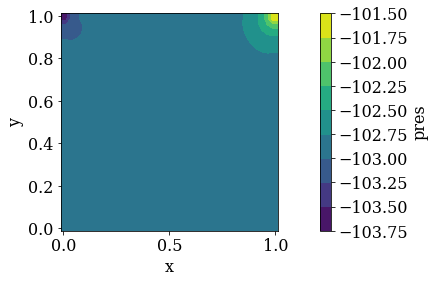

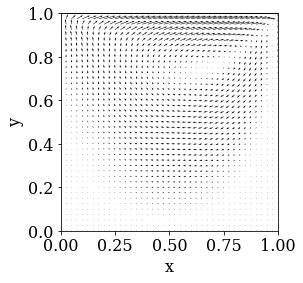

In [4]:
flowx.io.plot_contour(gridc, 'pres')
flowx.io.plot_vector(gridx,gridy,'velc')